In [5]:
from os import chdir
chdir('/Users/lananhnguyen/Desktop/thesis/thesis_code')
import main.packages.unchain_chain as chain
import main.packages.mine_generic as mine_g
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import re

colormap = plt.colormaps['Paired']
# num_colors = len(colormap.colors)
# colors = [colormap(i / num_colors) for i in range(num_colors)]
# num_bars = len(rmse_df.columns)
# colors = [colormap(i / num_bars) for i in range(num_bars)]  # Normalize the range [0, num_bars) to [0, 1)


In [24]:
def get_name_cols(col_name, separator='_h'):
    new_col_name = col_name.split(separator)
    if new_col_name[0] == 'cb':
        name = 'cb_' + ''.join([x[0] for x in new_col_name[1:-1]])
    else:
        name = new_col_name[0]
    return name 

/var/folders/74/zq2msw1x2fj9j2zyq8njktnc0000gn/T/ipykernel_22316/78574033.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[in_cat, in_h].set_xticklabels(new_col_names, rotation=45)  # Rotate and set alignment
/var/folders/74/zq2msw1x2fj9j2zyq8njktnc0000gn/T/ipykernel_22316/78574033.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[in_cat, in_h].set_xticklabels(new_col_names, rotation=45)  # Rotate and set alignment
/var/folders/74/zq2msw1x2fj9j2zyq8njktnc0000gn/T/ipykernel_22316/78574033.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[in_cat, in_h].set_xticklabels(new_col_names, rotation=45)  # Rotate and set alignment
/var/folders/74/zq2msw1x2fj9j2zyq8njktnc0000gn/T/ipykernel_22316/78574033.py:19: UserWarning: set_ti

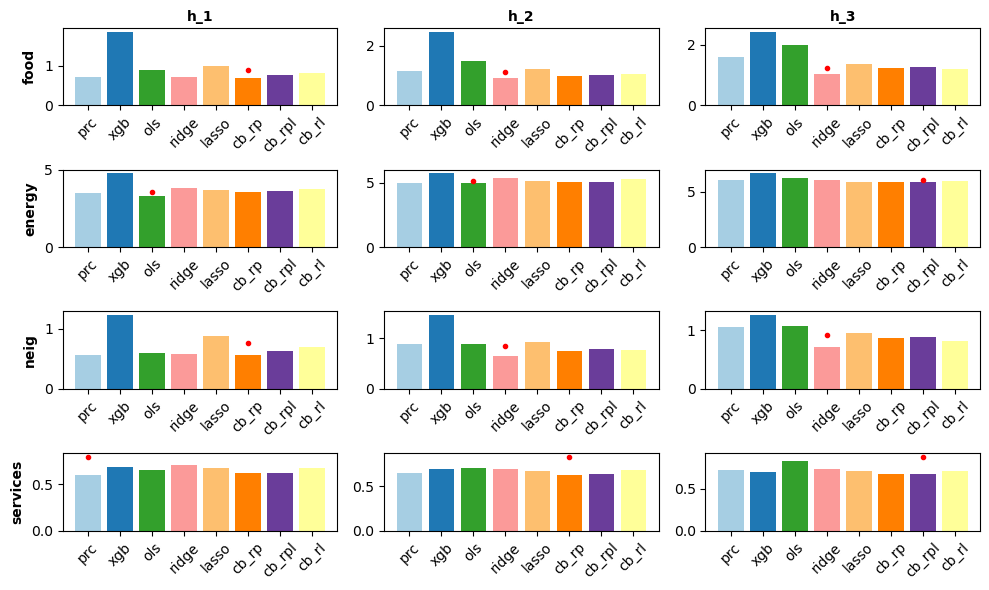

In [38]:
cat_short = ["food", "energy", "neig", "services"]

fig, ax = plt.subplots(4, 3, figsize = (10, 6))

for in_cat, cat in enumerate(cat_short):
    
    rmse_df = pd.read_csv(f"data/report_rmse/{cat}.csv", index_col=0)

    for in_h in range(rmse_df.shape[0]):
        # get x-axis name:
        new_col_names = [get_name_cols(col, "_") for col in rmse_df.columns]
        
        # Set color range:
        num_bars = len(rmse_df.columns)
        colors = [colormap(i / num_bars) for i in range(num_bars)] 

        # plot barplot:
        bars = ax[in_cat, in_h].bar(new_col_names, rmse_df.iloc[in_h, :], color = colors)
        ax[in_cat, in_h].set_xticklabels(new_col_names, rotation=45)  # Rotate and set alignment

        lowest_idx = rmse_df.iloc[in_h, :].idxmin()

        # Get bar container (collection object) instead of a single bar element
        bar_container = bars.patches  # Assuming bars is a PatchCollection object

        # Get lowest and highest bar objects using their indices
        lowest_bar = bar_container[rmse_df.columns.get_loc(lowest_idx)]
        lowest_height = lowest_bar.get_height()

        # Define marker properties (adjust offset and marker style as needed)
        marker_offset = 0.2  # Adjust offset for marker placement
        marker_style = '.'  # Choose marker style (e.g., 'o' for circle)

        # Add markers on top of the lowest and highest bars
        ax[in_cat, in_h].plot(lowest_bar.get_x() + lowest_bar.get_width() / 2, 
                             lowest_height + marker_offset, marker=marker_style, color='red')

    # set categorical name:
    ax[in_cat, 0].set_ylabel(cat_short[in_cat], rotation=90, fontsize=10, labelpad=5, fontweight = 'bold')

# annotate horizon:
for j, col_title in enumerate(rmse_df.index):
    ax[0, j].set_title(col_title, fontsize=10, pad = 5, fontweight = 'bold')


plt.tight_layout()
plt.show()
